# Desafio 3

Neste desafio, iremos praticar nossos conhecimentos sobre distribuições de probabilidade. Para isso,
dividiremos este desafio em duas partes:
    
1. A primeira parte contará com 3 questões sobre um *data set* artificial com dados de uma amostra normal e
    uma binomial.
2. A segunda parte será sobre a análise da distribuição de uma variável do _data set_ [Pulsar Star](https://archive.ics.uci.edu/ml/datasets/HTRU2), contendo 2 questões.

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns
from statsmodels.distributions.empirical_distribution import ECDF

In [9]:
#matplotlib inline

from IPython.core.pylabtools import figsize


figsize(12, 8)

sns.set()

In [ ]:
## Parte 1

### _Setup_ da parte 1

In [10]:
np.random.seed(42)
    
dataframe = pd.DataFrame({"normal": sct.norm.rvs(20, 4, size=10000),
                     "binomial": sct.binom.rvs(100, 0.2, size=10000)})

## Inicie sua análise a partir da parte 1 a partir daqui

In [11]:
# Sua análise da parte 1 começa aqui.
dataframe.head()

,normal,binomial
0,21.986857,18
1,19.446943,15
2,22.590754,14
3,26.092119,15
4,19.063387,21


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0D577BB0>,
      dtype=object)

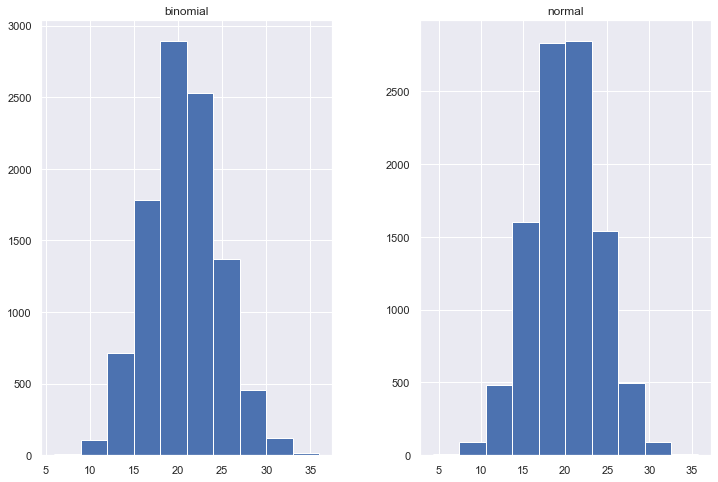

In [23]:
dataframe.hist()

In [12]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
normal      10000 non-null float64
binomial    10000 non-null int32
dtypes: float64(1), int32(1)
memory usage: 117.2 KB


In [13]:
dataframe.describe()

,normal,binomial
count,10000.000000,10000.000000
mean,19.991456,20.097000
std,4.013850,4.041191
min,4.310399,6.000000
25%,17.309638,17.000000
50%,19.989620,20.000000
75%,22.684324,23.000000
max,35.704951,36.000000


## Questão 1

Qual a diferença entre os quartis (Q1, Q2 e Q3) das variáveis `normal` e `binomial` de `dataframe`? Responda como uma tupla de três elementos arredondados para três casas decimais.

Em outra palavras, sejam `q1_norm`, `q2_norm` e `q3_norm` os quantis da variável `normal` e `q1_binom`, `q2_binom` e `q3_binom` os quantis da variável `binom`, qual a diferença `(q1_norm - q1 binom, q2_norm - q2_binom, q3_norm - q3_binom)`?

In [14]:
def q1():
    quantiles = dataframe.quantile([.25, .5, .75])
    quantiles_diff = quantiles['normal'] - quantiles['binomial']
    return tuple(quantiles_diff.round(3).to_list())
    pass

In [15]:
q1()

(0.31, -0.01, -0.316)

Para refletir:

* Você esperava valores dessa magnitude?

* Você é capaz de explicar como distribuições aparentemente tão diferentes (discreta e contínua, por exemplo) conseguem dar esses valores?

In [24]:
ecdf = ECDF(dataframe['normal'])

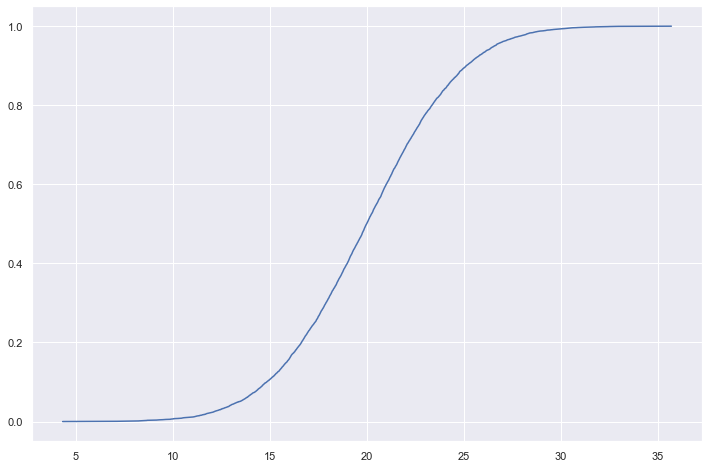

In [26]:
plt.plot(ecdf.x, ecdf.y)

In [27]:
ecdf_df = pd.DataFrame({'values': ecdf.x, 'prob': ecdf.y})
ecdf_df

,values,prob
0,-inf,0.0000
1,4.310399,0.0001
2,4.653378,0.0002
3,5.246539,0.0003
4,5.595660,0.0004
5,7.033945,0.0005
6,7.034931,0.0006
7,7.115935,0.0007
8,7.293185,0.0008
9,7.318297,0.0009


## Questão 2

Considere o intervalo $[\bar{x} - s, \bar{x} + s]$, onde $\bar{x}$ é a média amostral e $s$ é o desvio padrão. Qual a probabilidade nesse intervalo, calculada pela função de distribuição acumulada empírica (CDF empírica) da variável `normal`? Responda como uma único escalar arredondado para três casas decimais.

In [16]:
def q2():
    inferior = dataframe.normal.mean() - dataframe.normal.std()
    superior = dataframe.normal.mean() + dataframe.normal.std()
    
    ecdf = ECDF(dataframe.normal)
    
    return np.float(round(ecdf(superior) - ecdf(inferior), 3))
    pass

In [17]:
q2()

0.684

Para refletir:

* Esse valor se aproxima do esperado teórico?
* Experimente também para os intervalos $[\bar{x} - 2s, \bar{x} + 2s]$ e $[\bar{x} - 3s, \bar{x} + 3s]$.

## Questão 3

Qual é a diferença entre as médias e as variâncias das variáveis `binomial` e `normal`? Responda como uma tupla de dois elementos arredondados para três casas decimais.

Em outras palavras, sejam `m_binom` e `v_binom` a média e a variância da variável `binomial`, e `m_norm` e `v_norm` a média e a variância da variável `normal`. Quais as diferenças `(m_binom - m_norm, v_binom - v_norm)`?

In [18]:
def q3():
    return(
        (dataframe.mean()['binomial'] - dataframe.mean()['normal']).round(decimals=3), 
        (dataframe.var()['binomial'] - dataframe.var()['normal']).round(decimals=3))
    pass

In [19]:
q3()

(0.106, 0.22)

Para refletir:

* Você esperava valore dessa magnitude?
* Qual o efeito de aumentar ou diminuir $n$ (atualmente 100) na distribuição da variável `binomial`?

## Parte 2

### _Setup_ da parte 2

In [20]:
stars = pd.read_csv("pulsar_stars.csv")

stars.rename({old_name: new_name
              for (old_name, new_name)
              in zip(stars.columns,
                     ["mean_profile", "sd_profile", "kurt_profile", "skew_profile", "mean_curve", "sd_curve", "kurt_curve", "skew_curve", "target"])
             },
             axis=1, inplace=True)

stars.loc[:, "target"] = stars.target.astype(bool)

## Inicie sua análise da parte 2 a partir daqui

In [21]:
# Sua análise da parte 2 começa aqui.
stars.head()

,mean_profile,sd_profile,kurt_profile,skew_profile,mean_curve,sd_curve,kurt_curve,skew_curve,target
0,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,False
1,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,False
2,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,False
3,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,False
4,93.570312,46.698114,0.531905,0.416721,1.636288,14.545074,10.621748,131.394004,False


In [22]:
stars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17897 entries, 0 to 17896
Data columns (total 9 columns):
mean_profile    17897 non-null float64
sd_profile      17897 non-null float64
kurt_profile    17897 non-null float64
skew_profile    17897 non-null float64
mean_curve      17897 non-null float64
sd_curve        17897 non-null float64
kurt_curve      17897 non-null float64
skew_curve      17897 non-null float64
target          17897 non-null bool
dtypes: bool(1), float64(8)
memory usage: 1.1 MB


(array([ 275.,  360.,  348.,  611., 2505., 5875., 6014., 1712.,  170.,
          27.]), array([  5.8125    ,  24.49296875,  43.1734375 ,  61.85390625,
         80.534375  ,  99.21484375, 117.8953125 , 136.57578125,
        155.25625   , 173.93671875, 192.6171875 ]), <a list of 10 Patch objects>)

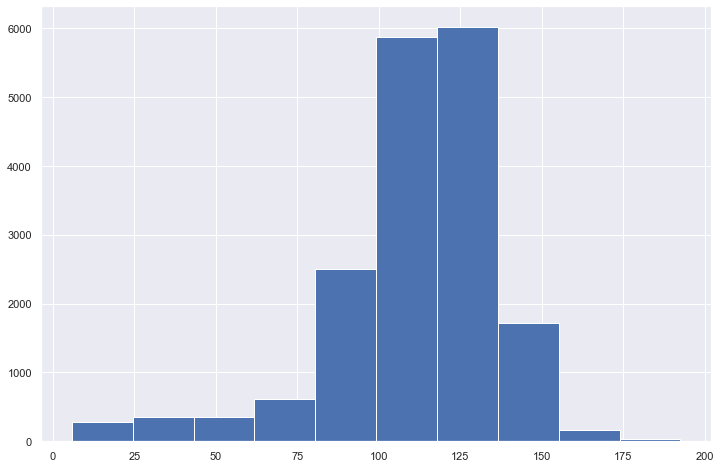

In [28]:
plt.hist(stars['mean_profile'])

## Questão 4

Considerando a variável `mean_profile` de `stars`:

1. Filtre apenas os valores de `mean_profile` onde `target == 0` (ou seja, onde a estrela não é um pulsar).
2. Padronize a variável `mean_profile` filtrada anteriormente para ter média 0 e variância 1.

Chamaremos a variável resultante de `false_pulsar_mean_profile_standardized`.

Encontre os quantis teóricos para uma distribuição normal de média 0 e variância 1 para 0.80, 0.90 e 0.95 através da função `norm.ppf()` disponível em `scipy.stats`.

Quais as probabilidade associadas a esses quantis utilizando a CDF empírica da variável `false_pulsar_mean_profile_standardized`? Responda como uma tupla de três elementos arredondados para três casas decimais.

In [29]:
def q4():
    df_f = stars['mean_profile'][stars['target'] == False]
    false_pulsar_mean_profile_standardized = (df_f - df_f.mean())/df_f.std(ddof=0)
    ppf = sct.norm.ppf([0.80, 0.90, 0.95])
    ecdf = ECDF(false_pulsar_mean_profile_standardized)
    return (ecdf(ppf[0]).round(decimals=3), ecdf(ppf[1]).round(decimals=3), ecdf(ppf[2]).round(decimals=3))
    pass

In [31]:
q4()

(0.806, 0.911, 0.959)

Para refletir:

* Os valores encontrados fazem sentido?
* O que isso pode dizer sobre a distribuição da variável `false_pulsar_mean_profile_standardized`?

## Questão 5

Qual a diferença entre os quantis Q1, Q2 e Q3 de `false_pulsar_mean_profile_standardized` e os mesmos quantis teóricos de uma distribuição normal de média 0 e variância 1? Responda como uma tupla de três elementos arredondados para três casas decimais.

In [35]:
def q5():
    df_f = stars['mean_profile'][stars['target'] == False]
    false_pulsar_mean_profile_standardized = (df_f - df_f.mean())/df_f.std(ddof=0)
    ppf = sct.norm.ppf([.25, .5, .75])
    q1 = false_pulsar_mean_profile_standardized.describe()['25%']
    q2 = false_pulsar_mean_profile_standardized.describe()['50%']
    q3 = false_pulsar_mean_profile_standardized.describe()['75%']

    return ((q1-ppf[0]).round(decimals=3), (q2-ppf[1]).round(decimals=3), (q3-ppf[2]).round(decimals=3))
    pass

In [36]:
q5()

(0.027, 0.04, -0.004)

Para refletir:

* Os valores encontrados fazem sentido?
* O que isso pode dizer sobre a distribuição da variável `false_pulsar_mean_profile_standardized`?
* Curiosidade: alguns testes de hipóteses sobre normalidade dos dados utilizam essa mesma abordagem.